In [1]:
from google.colab import files
uploaded = files.upload()

Saving jobs_in_data.csv to jobs_in_data.csv


In [2]:
import pandas as pd

df = pd.read_csv('/content/jobs_in_data.csv')
#print(df)
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


DATA CLEANING

In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [4]:
# Drop duplicates
jobs_data = df.drop_duplicates()

# Display basic info
print("\nDataset Information:")
jobs_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5341 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   object
dtypes: int64(3), object(9)
memory usage: 542.4+ KB


In [5]:
# Basic statistics
print("\nBasic Statistics:")
print(jobs_data.describe(include='all'))


Basic Statistics:
          work_year      job_title               job_category salary_currency  \
count   5341.000000           5341                       5341            5341   
unique          NaN            125                         10              11   
top             NaN  Data Engineer  Data Science and Research             USD   
freq            NaN           1100                       1655            4707   
mean    2022.682082            NaN                        NaN             NaN   
std        0.608026            NaN                        NaN             NaN   
min     2020.000000            NaN                        NaN             NaN   
25%     2022.000000            NaN                        NaN             NaN   
50%     2023.000000            NaN                        NaN             NaN   
75%     2023.000000            NaN                        NaN             NaN   
max     2023.000000            NaN                        NaN             NaN   

        

In [6]:
# Ensure proper data types
jobs_data.loc[:, 'work_year'] = jobs_data['work_year'].astype(int)

**CATEGORICAL ANALYSIS**

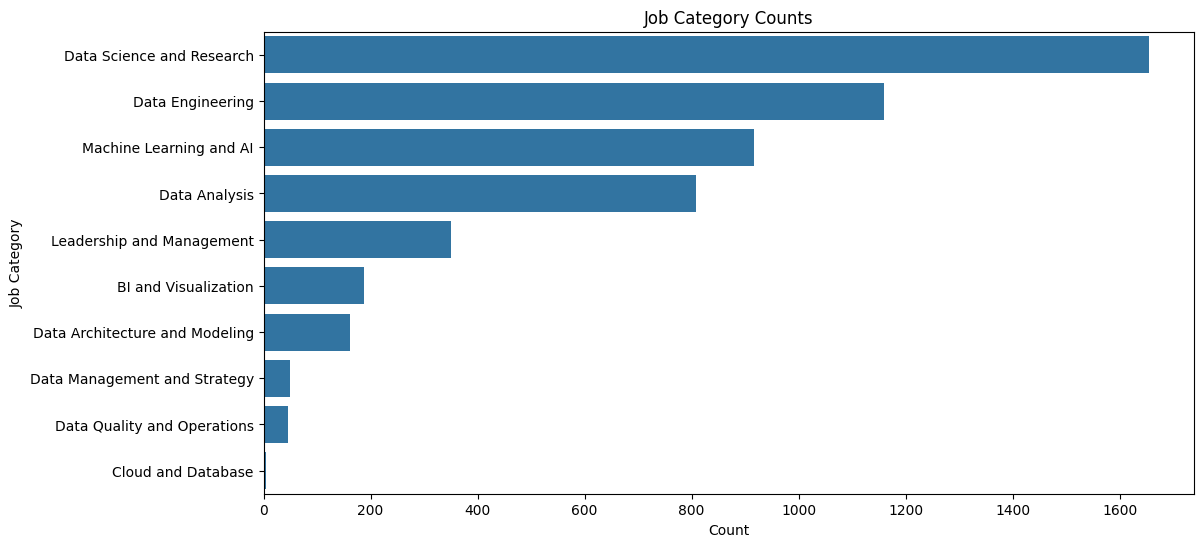

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

# Job categories count
plt.figure(figsize=(12, 6))
sns.countplot(data=jobs_data, y='job_category', order=jobs_data['job_category'].value_counts().index)
plt.title("Job Category Counts")
plt.xlabel("Count")
plt.ylabel("Job Category")
plt.show()

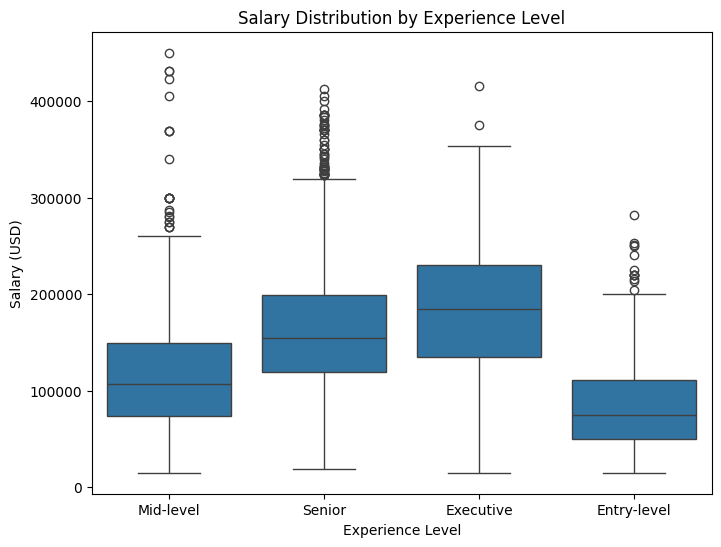

In [8]:
# Experience level impact on salary
plt.figure(figsize=(8, 6))
sns.boxplot(data=jobs_data, x='experience_level', y='salary_in_usd')
plt.title("Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

**NUMERICAL ANALYSIS**

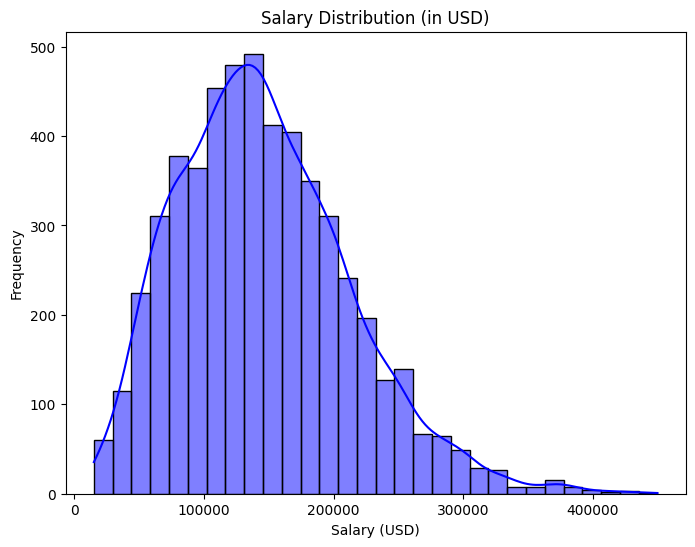

In [9]:
# Salary distribution
plt.figure(figsize=(8, 6))
sns.histplot(jobs_data['salary_in_usd'], kde=True, color='blue', bins=30)
plt.title("Salary Distribution (in USD)")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

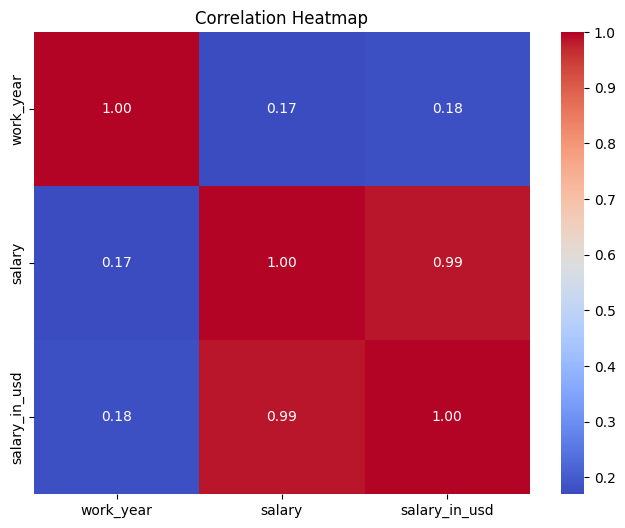

In [10]:
# Correlation heatmap
numerical_cols = jobs_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8, 6))
sns.heatmap(jobs_data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**GEOGRAPHICAL ANALYSIS**

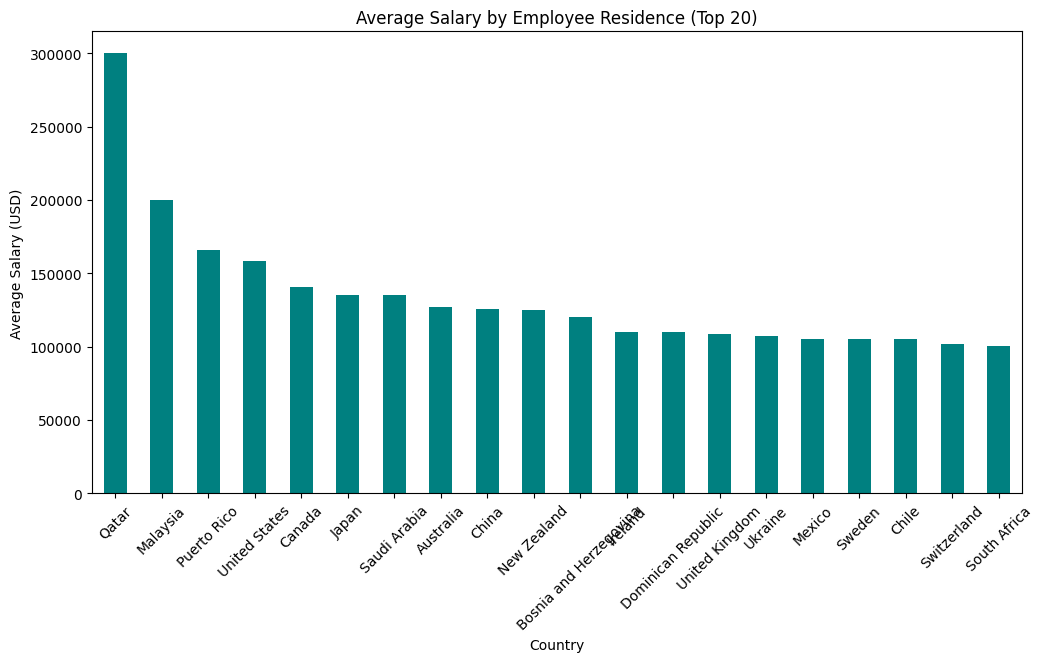

In [11]:
# Salary by employee residence
residence_salary = jobs_data.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
residence_salary.head(20).plot(kind='bar', color='teal')
plt.title("Average Salary by Employee Residence (Top 20)")
plt.xlabel("Country")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.show()

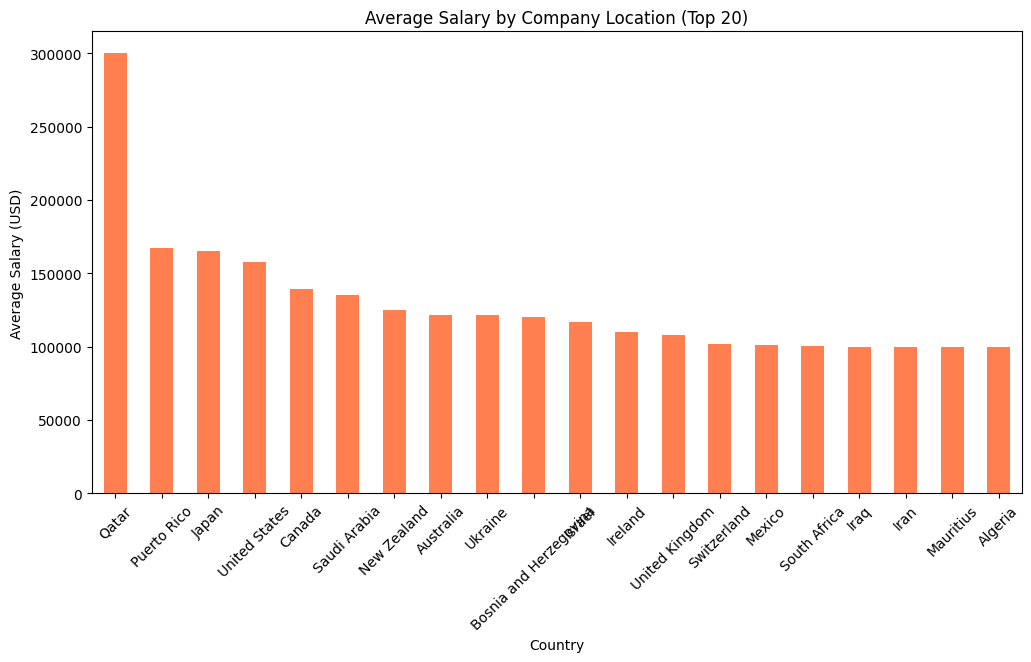

In [12]:
# Salary by company location
company_location_salary = jobs_data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
company_location_salary.head(20).plot(kind='bar', color='coral')
plt.title("Average Salary by Company Location (Top 20)")
plt.xlabel("Country")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.show()

**TRENDS OVER TIME**

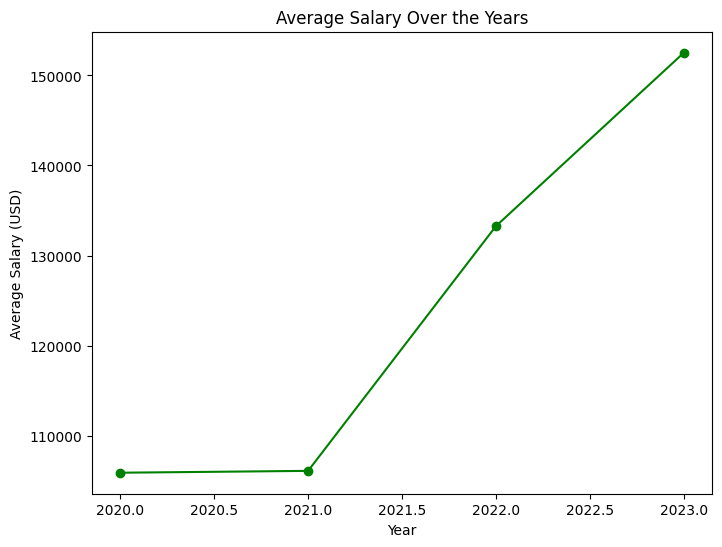

In [13]:
# Salary trends over years
yearly_salary = jobs_data.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(8, 6))
yearly_salary.plot(marker='o', linestyle='-', color='green')
plt.title("Average Salary Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.show()

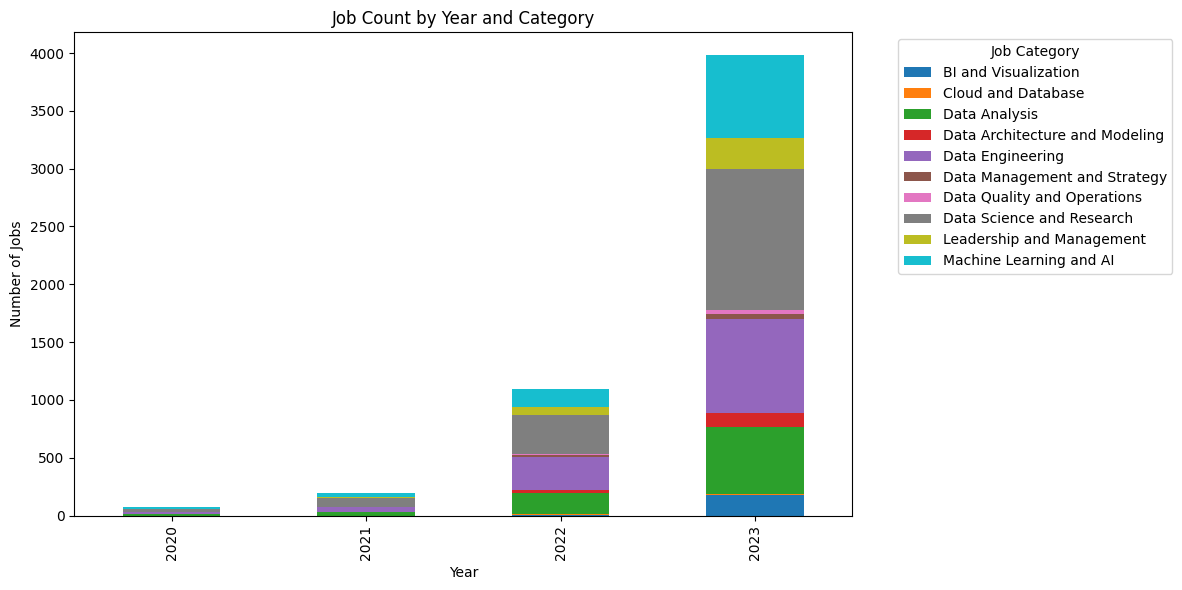

In [14]:
# Jobs by year and category
job_count_year = jobs_data.groupby(['work_year', 'job_category']).size().unstack()
job_count_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Job Count by Year and Category")
plt.xlabel("Year")
plt.ylabel("Number of Jobs")
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

SUMMARY STATS

In [15]:
# Salary statistics by job category
category_salary_stats = jobs_data.groupby('job_category')['salary_in_usd'].agg(['mean', 'median', 'max', 'min']).sort_values(by='mean', ascending=False)
print("\nSalary Statistics by Job Category:")
print(category_salary_stats)


Salary Statistics by Job Category:
                                         mean    median     max     min
job_category                                                           
Machine Learning and AI         170453.221374  168000.0  423000   15000
Data Science and Research       157131.039879  153000.0  450000   16000
Data Architecture and Modeling  157054.006173  150000.0  376080   52500
Cloud and Database              155000.000000  160000.0  190000  115000
Leadership and Management       149020.108262  140000.0  430640   20000
Data Engineering                142967.543103  135000.0  385000   18000
BI and Visualization            128377.734043  125004.5  259900   15000
Data Management and Strategy    107655.836735   93593.0  250000   46400
Data Analysis                   106707.058096  100000.0  430967   15000
Data Quality and Operations     104586.022222   82000.0  289120   23753


In [16]:
# Experience level count
experience_level_count = jobs_data['experience_level'].value_counts()
print("\nExperience Level Distribution:")
print(experience_level_count)


Experience Level Distribution:
experience_level
Senior         3444
Mid-level      1274
Entry-level     400
Executive       223
Name: count, dtype: int64
